# Fashion Classification 

# Problem statement 

The data set for this project consists of 70,000 images whihc is divided into 60,000 training sample and 10,000 testing sample. Each image is on 28x28 grayscale with 1 out of 10 label classes.
The 10 classes are listed below:
0 - T-shirt/top
1 - Trouser 
2 - Pullover 
3 - Dress 
4 - Coat 
5 - Sandal
6 - Shirt 
7 - Sneaker
8 - Bag
9 - Ankle Boot

The image has a width and height of 28 pixel which comes up to 784 pixels in total. Each pixel has a pixel value which translates to the grey shade. The values ranges from 0 to 255. The higher the value, the darker the pixel is.



# Importing data 

In [29]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random #random give random values within a set range

In [11]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep= ',')

In [10]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep= ',')

# Data Visualization 

In [12]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [16]:
fashion_train_df.shape

(60000, 785)

In [17]:
fashion_test_df.shape

(10000, 785)

In [18]:
training = np.array(fashion_train_df, dtype = 'float32')# data type float 32

In [19]:
testing = np.array(fashion_test_df, dtype = 'float32')# data type float 32

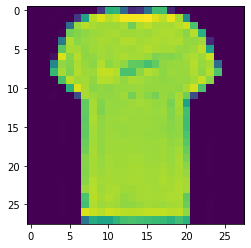

In [20]:
plt.imshow(training[10, 1:].reshape(28,28)) #imshow shows image and reshape show the image in the given dimension 

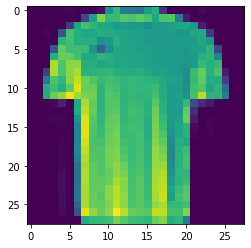

In [21]:
plt.imshow(training[600, 1:].reshape(28,28))

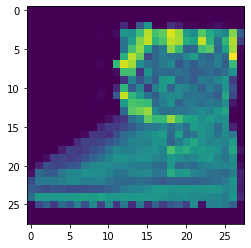

In [22]:
plt.imshow(training[12,1:].reshape(28,28))

0.0

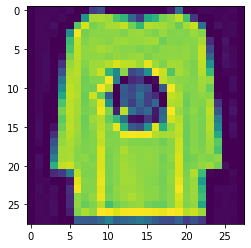

In [32]:
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

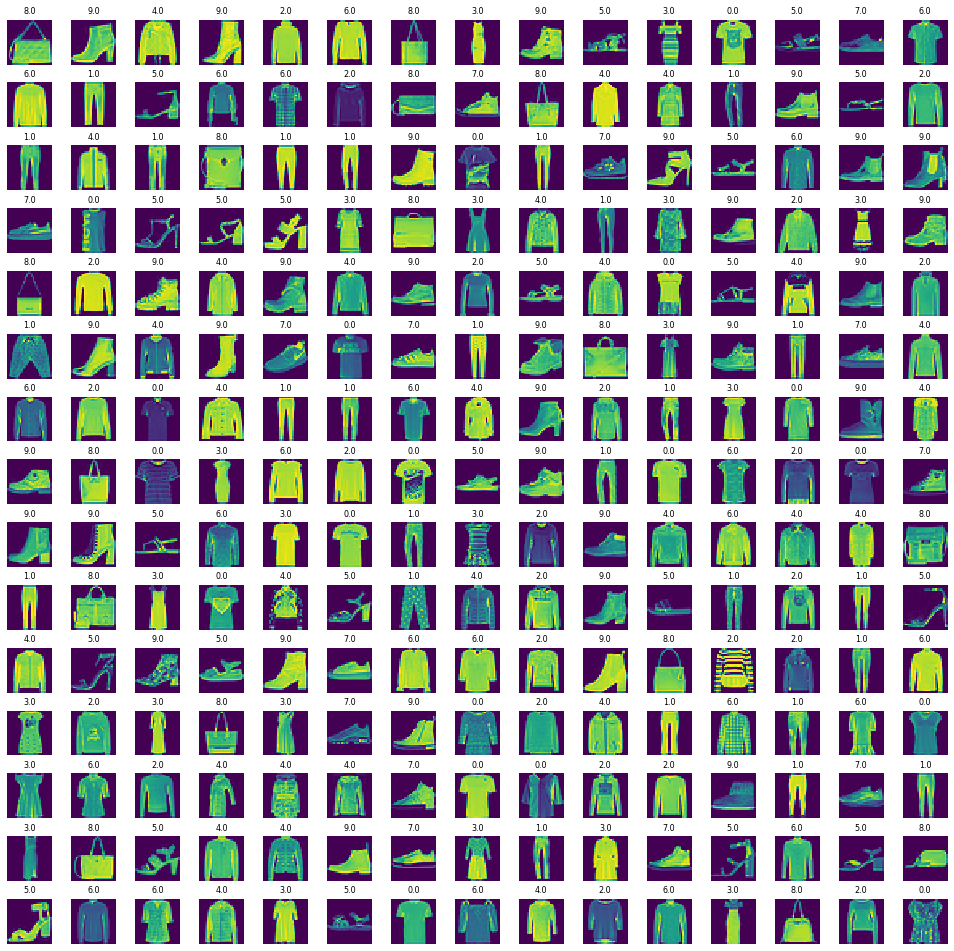

In [40]:
# to view images on grid format
# to define dimensions of the grid to be ploted
w_grid = 15 #width of the grid
l_grid = 15 #length of the grid 

fig, axes = plt.subplots(l_grid,w_grid, figsize = (17,17)) # plot returns figure object and axes object

axes = axes.ravel() #flaten the 15x15 matrix into 225 array

n_training = len(training)# to get the length of the training dataset


#to get a random value from 0 to n_training
for i in np.arange(0, w_grid * l_grid): # to get each variable/box within the grid evenly spaced
    index = np.random.randint(0, n_training)# to genrate random values/random images from 0 to the lenght of training 
    #read and display the image according the choosen index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8) # to get the target class
    axes[i].axis('off') #show not show the axis details like pixel numbers
    
plt.subplots_adjust(hspace = 0.4) #set the height among the images 